In [491]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PowerTransformer

In [492]:
used = []

In [493]:
train = pd.read_csv('../../2nd-Comp-Data/train.csv')
test = pd.read_csv('../../2nd-Comp-Data/test.csv')
testOriginal = pd.read_csv('../../2nd-Comp-Data/test.csv')

In [494]:
train.shape

(181507, 272)

In [495]:
test.drop('row ID', axis=1, inplace=True)

<h3>SubArea Removal<h3>

In [496]:
test.drop('sub_area', axis=1, inplace=True)
train.drop('sub_area', axis=1, inplace=True)
used.append('Removed sub_area')

<h1>Categorical To Numerical<h1>

<h3>OneHot<h3>

In [497]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)
used.append('One-hot Encoding')

In [498]:
# train = train[['full_sq', 'floor', 'build_count_monolith', 'industrial_km', 'trc_sqm_500','mosque_count_500', 'leisure_count_500', 'office_sqm_1000', 'cafe_count_1000_price_high', 'leisure_count_1000', 'power_transmission_line_km', 'big_market_km', 'public_healthcare_km', 'workplaces_km', 'shopping_centers_raion', 'green_part_500']]
# test = test[['full_sq', 'floor', 'build_count_monolith', 'industrial_km', 'trc_sqm_500','mosque_count_500', 'leisure_count_500', 'office_sqm_1000', 'cafe_count_1000_price_high', 'leisure_count_1000', 'power_transmission_line_km', 'big_market_km', 'public_healthcare_km', 'workplaces_km', 'shopping_centers_raion', 'green_part_500']]

<h3>Label<h3>

In [499]:
# categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
# print("Train: Categorical columns:", categorical_columns)

# label_encoder = LabelEncoder()

# for column in categorical_columns:
#     train[column] = label_encoder.fit_transform(train[column])

# categorical_columns_test = test.select_dtypes(include=['object']).columns.tolist()
# print("Test: Categorical columns:", categorical_columns_test)

# label_encoder = LabelEncoder()

# for column in categorical_columns_test:
#     test[column] = label_encoder.fit_transform(test[column])

# used.append('Label Encoding')

<h1>Scaling<h1>

In [500]:
# def check_scaling_needed(dataframe, threshold=5):
#     """
#     Identify columns in a pandas DataFrame that may require scaling.

#     Parameters:
#     - dataframe: pandas DataFrame
#     - threshold: Range threshold to determine if a column requires scaling (default is 5)

#     Returns:
#     - List of tuples containing (column_name, range_value) for columns that may require scaling.
#     """
#     scaling_needed_columns = []

#     for column in dataframe.columns:
#         if dataframe[column].dtype in ['int64', 'float64']:
#             column_range = dataframe[column].max() - dataframe[column].min()
#             if column_range > threshold:
#                 scaling_needed_columns.append((column, column_range))

#     return scaling_needed_columns

# scaling_needed_columns = check_scaling_needed(train)

# if not scaling_needed_columns:
#     print("No columns require scaling.")
# else:
#     print("Columns that may require scaling:")
#     for column, column_range in scaling_needed_columns:
#         print(f"{column}: Range = {column_range}")


In [501]:
# scaling_needed_columns = check_scaling_needed(train)
# scaler = MinMaxScaler()

# for column, _ in scaling_needed_columns:
#     if train[column].dtype in ['int64', 'float64']:
#         train[column] = scaler.fit_transform(train[[column]])

# scaler = RobustScaler()
# train = scaler.fit_transform(train)
# test = scaler.fit_transform(test)  

<h1>Normalization<h1>

In [502]:
# def find_skewed_columns(dataframe, threshold=0.5):
#     """
#     Identify skewed columns in a pandas DataFrame.

#     Parameters:
#     - dataframe: pandas DataFrame
#     - threshold: Skewness threshold to determine if a column is skewed (default is 0.5)

#     Returns:
#     - List of tuples containing (column_name, skewness_value) for skewed columns.
#     """
#     skewed_columns = []
    
#     for column in dataframe.columns:
#         if dataframe[column].dtype in ['int64', 'float64']:
#             skewness = skew(dataframe[column])
#             if abs(skewness) > threshold:
#                 skewed_columns.append((column, skewness))
    
#     return skewed_columns

# skewed_columns = find_skewed_columns(train)

# if not skewed_columns:
#     print("No skewed columns found.")
# else:
#     print("Skewed columns:")
#     for column, skewness in skewed_columns:
#         print(f"{column}: Skewness = {skewness}")

In [503]:
# for column, _ in skewed_columns:
#     if train[column].dtype in ['int64', 'float64']:
#         train[column] = train[column].apply(lambda x: 1 if x == 0 else np.log(x))

<h1>Working<h1>

In [504]:
X = train.loc[:, train.columns != 'price_doc']
y = train[['price_doc']]

# X = X[['full_sq', 'floor', 'build_count_monolith', 'industrial_km', 'trc_sqm_500','mosque_count_500', 'leisure_count_500', 'office_sqm_1000', 'cafe_count_1000_price_high', 'leisure_count_1000', 'power_transmission_line_km', 'big_market_km', 'public_healthcare_km', 'workplaces_km', 'shopping_centers_raion', 'green_part_500']]
# test = test[['full_sq', 'floor', 'build_count_monolith', 'industrial_km', 'trc_sqm_500','mosque_count_500', 'leisure_count_500', 'office_sqm_1000', 'cafe_count_1000_price_high', 'leisure_count_1000', 'power_transmission_line_km', 'big_market_km', 'public_healthcare_km', 'workplaces_km', 'shopping_centers_raion', 'green_part_500']]

# used.append('Forward Feataure Selection (n=16)')

# scaler = RobustScaler()
# X = scaler.fit_transform(X)
# test = scaler.transform(test)  

In [505]:
X.shape

(181507, 287)

In [506]:
test.shape

(77789, 287)

<h3>PCA<h3> 
<h5><i>Remember to set X2 & test2<i><h5>

In [507]:
# X.shape

In [508]:
# test.shape

In [509]:
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(X)
# X2 = pd.DataFrame(data = principalComponents)

# pca2 = PCA(n_components=20)
# principalComponents = pca2.fit_transform(test)
# test2 = pd.DataFrame(data = principalComponents)

In [510]:
# #plot an elbow graph to find the optimal number of components
# import matplotlib.pyplot as plt
# plt.plot(pca.explained_variance_ratio_)
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')

In [511]:
# ols_reg = LinearRegression()
# sfs = SequentialFeatureSelector(ols_reg, direction='forward',n_features_to_select=5)
# sfs.fit(X, y)
# print(sfs.get_feature_names_out())

In [512]:
# X = X[['full_sq', 'mosque_count_500', 'leisure_count_500', 'cafe_count_1000_price_high', 'leisure_count_1000']]
# test = test[['full_sq', 'mosque_count_500', 'leisure_count_500', 'cafe_count_1000_price_high', 'leisure_count_1000']]

<h1>Feature Importance<h1>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.28619e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Feature: 0, Score: 955.04472
Feature: 1, Score: 290.97950
Feature: 2, Score: 61222.51306
Feature: 3, Score: 0.00086
Feature: 4, Score: 3.55086
Feature: 5, Score: 438111.00592
Feature: 6, Score: -99472.59052
Feature: 7, Score: 80.59011
Feature: 8, Score: 126305.00285
Feature: 9, Score: -37.11145
Feature: 10, Score: 23462.43807
Feature: 11, Score: 1084656.31390
Feature: 12, Score: 169472.02745
Feature: 13, Score: 314400.17567
Feature: 14, Score: 13062.49279
Feature: 15, Score: -45719.88117
Feature: 16, Score: -1310.67014
Feature: 17, Score: -25813.44264
Feature: 18, Score: 5138.50915
Feature: 19, Score: -0.00463
Feature: 20, Score: 1.99840
Feature: 21, Score: 0.74474
Feature: 22, Score: 4.47960
Feature: 23, Score: -10.63276
Feature: 24, Score: 60.60555
Feature: 25, Score: 1.52703
Feature: 26, Score: -9.98208
Feature: 27, Score: -7.01905
Feature: 28, Score: 7.70687
Feature: 29, Score: 51.54481
Feature: 30, Score: 28.72374
Feature: 31, Score: 0.04372
Feature: 32, Score: 21.90555
Feature: 3

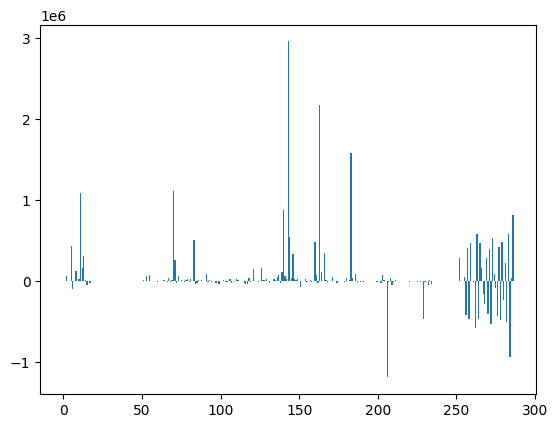

In [513]:
#give me code for feature importance using linear regression
from statistics import LinearRegression

alpha_value = 100  # You can adjust the alpha parameter based on your needs

model = Ridge(alpha=alpha_value, random_state=42)
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# drop features with low importance
threshold = 20000  # Adjust the threshold as needed
selected_features = [feature for feature, score in zip(X.columns, importance) if score >= threshold]
print(len(selected_features))
X= X[selected_features]
test = test[selected_features]

used.append('Feature Importance Based Selection (Ridge Regression (alpha=100))')

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

<h1>Forward Feature Selection<h1>

In [514]:
# ols_reg = LinearRegression()
# sfs = SequentialFeatureSelector(ols_reg, direction='forward',n_features_to_select=12)
# sfs.fit(X, y)
# print(sfs.get_feature_names_out())

In [515]:
# X2 = X[['full_sq', 'floor', 'build_count_monolith', 'industrial_km', 'trc_sqm_500',
#  'mosque_count_500', 'leisure_count_500', 'office_sqm_1000',
#  'cafe_count_1000_price_high', 'leisure_count_1000', 'power_transmission_line_km', 
#  'big_market_km', 'public_healthcare_km', 'workplaces_km']]
# test2 = test[['full_sq', 'floor', 'build_count_monolith', 'industrial_km', 'trc_sqm_500',
#  'mosque_count_500', 'leisure_count_500', 'office_sqm_1000',
#  'cafe_count_1000_price_high', 'leisure_count_1000', 'power_transmission_line_km', 
#  'big_market_km', 'public_healthcare_km', 'workplaces_km']]

<h1>Min_Max Scaling<h1>

In [516]:
scaler = MinMaxScaler()
X3 = scaler.fit_transform(X)
test3 = scaler.transform(test)  

# used.append('StandardScaler')
used.append('MinMaxScaler')

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X3)
X3 = pd.DataFrame(data = principalComponents)

pca2 = PCA(n_components=10)
principalComponents = pca2.fit_transform(test3)
test3 = pd.DataFrame(data = principalComponents)

used.append('PCA (n=10)')

<h1>Normalization For Robust<h1>

In [517]:
# X2 = np.log(X2)
# test2 = np.log(test2)

In [518]:
# log_normalizer = PowerTransformer(method='box-cox', standardize=False)
# X2 = log_normalizer.fit_transform(X2)
# test2 = log_normalizer.transform(test2)

In [519]:
# def find_skewed_columns(dataframe, threshold=0.5):
#     """
#     Identify skewed columns in a pandas DataFrame.

#     Parameters:
#     - dataframe: pandas DataFrame
#     - threshold: Skewness threshold to determine if a column is skewed (default is 0.5)

#     Returns:
#     - List of tuples containing (column_name, skewness_value) for skewed columns.
#     """
#     skewed_columns = []
    
#     for column in dataframe.columns:
#         if dataframe[column].dtype in ['int64', 'float64']:
#             skewness = skew(dataframe[column])
#             if abs(skewness) > threshold:
#                 skewed_columns.append((column, skewness))
    
#     return skewed_columns

# skewed_columns = find_skewed_columns(X2)

# if not skewed_columns:
#     print("No skewed columns found.")
# else:
#     print("Skewed columns:")
#     for column, skewness in skewed_columns:
#         print(f"{column}: Skewness = {skewness}")

In [520]:
# for column, _ in skewed_columns:
#     if X2[column].dtype in ['int64', 'float64']:
#         X2[column] = X2[column].apply(lambda x: 1 if x == 0 else np.log(x))
#         test2[column] = test2[column].apply(lambda x: 1 if x == 0 else np.log(x))

<h1>P-Value Selection<h1>

In [521]:
# # # Convert scaled_df1 to a DataFrame without specifying columns
# # scaled_df1_df = pd.DataFrame(scaled_df1)

# X_p = X.astype(float)

# # Add a constant term to the feature matrix
# X_with_const = sm.add_constant(X_p)

# # Fit a linear regression model
# model = sm.OLS(y, X_with_const).fit()

# # Get p-values for each feature
# p_values = model.pvalues[1:]  # Exclude the constant term

# # Set your desired threshold for p-value
# threshold = 0.000000000000000001

# # Filter features based on p-value
# selected_features = p_values[p_values < threshold].index

# # Display selected features
# print("Selected Features:")
# print(selected_features)
# print(len(selected_features))

# # Select columns in the DataFrame
# X3 = X[selected_features]
# test3 = test[selected_features]

# used.append('p-Value Feature Selection')

# # X = X.astype(float)
# # X = sm.add_constant(X)
# # mod = sm.OLS(y, X)
# # res = mod.fit()
# # pvalues = res.pvalues
# # columns = pvalues[pvalues<0.05].index
# # print(columns)
# # print(len(columns))

# # # Select columns in the DataFrame
# # X2 = X[columns]
# # test2 = test[columns]

<h1>Variance Based Selection<h1>

In [522]:
# threshold_value = 1000
# variance_filter = VarianceThreshold(threshold=threshold_value)

# X3 = variance_filter.fit_transform(X3)
# test3 = variance_filter.transform(test3)

# used.append('Variance Based Feature Selection')
# X3.shape

<h1> Poly Interaction ONNNNNNNNN<h1>

In [523]:
poly = PolynomialFeatures(2)#, interaction_only=True)
X3 = poly.fit_transform(X3)
test3 = poly.fit_transform(test3)

used.append('PolynomialFeatures W/O Interaction')
# used.append('PolynomialFeatures With Interaction')

<h1>Applying Model<h1>

In [524]:
X3.shape

(181507, 66)

In [525]:
test3.shape

(77789, 66)

In [526]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [527]:
# reg2 = LinearRegression().fit(X_train, y_train)
# y_pred = reg2.predict(X_test)
# print("LR: R2 = %.4f and MSE = %.2f" % (reg2.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

In [528]:
# reg2 = LinearRegression().fit(X_train, y_train)
# y_pred = reg2.predict(X_test)
# print("LR: R2 = %.4f and MSE = %.2f" % (reg2.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

In [529]:
# Create and train the Ridge regression model
alpha_value = 100  # You can adjust the alpha parameter based on your needs
ridge_reg = Ridge(alpha=alpha_value, random_state=42)
ridge_reg.fit(X3, y)

# Print the coefficients and intercept
print("Coefficients:", ridge_reg.coef_)
print("Intercept:", ridge_reg.intercept_)

used.append('Ridge Regression Alpha = 100')

# Make predictions on the test data
y_pred_ridge = ridge_reg.predict(test3)

Coefficients: [[ 0.00000000e+00  1.73796247e+07  1.17495051e+06  1.32509528e+06
  -4.79705390e+05 -6.21345410e+05  2.33640119e+06 -8.23944382e+05
  -3.29706388e+06 -1.30050262e+06  1.00122228e+05 -1.60776967e+06
   5.39528442e+05 -2.59349232e+05 -1.14095240e+05 -5.53113927e+05
  -1.14745314e+06 -4.65259910e+05  9.12657300e+05  3.05518514e+05
  -2.10179047e+05 -4.42319165e+06 -3.86811367e+06  3.34792378e+06
   2.80796447e+06 -6.79175321e+04  1.38904629e+06 -1.73063671e+05
  -3.36541920e+06 -1.16033588e+06  1.25939789e+05 -8.78646179e+04
  -2.65298740e+06 -2.89922791e+05  1.21134733e+06  4.23469310e+05
  -1.81783627e+06  1.40251330e+03  5.22232699e+04 -4.73827535e+06
   6.65830937e+05 -8.39408379e+05  8.87282925e+05  1.41201196e+06
   4.00030473e+05 -1.24659090e+06 -3.67055972e+06  2.41891083e+06
   4.09949215e+06  1.19081597e+06  1.17474796e+06 -1.73231389e+06
  -2.04602333e+06 -8.87736061e+05  1.61179015e+06  3.72781788e+05
  -1.34431722e+06  1.78186360e+06  1.23745024e+06  4.10449518e

In [530]:
# Save the predictions to a CSV file
result_df_ridge = pd.DataFrame({'row ID': testOriginal['row ID'], 'price_doc': y_pred_ridge.flatten()})
result_df_ridge.to_csv('Day6.3.csv', index=False)

In [531]:
print("Features Used: " + str(X3.shape[1]) + "\n")
for i in used:
    print(i)

Features Used: 66

Removed sub_area
One-hot Encoding
Feature Importance Based Selection (Ridge Regression (alpha=100))
MinMaxScaler
PCA (n=10)
PolynomialFeatures W/O Interaction
Ridge Regression Alpha = 100
